In [2]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt


In [5]:
#prepare data

x_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 2, random_state = 1)
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = x.shape
print(n_samples)
print(n_features)

100
1


In [7]:
#Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [11]:
# Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [14]:
#Training model

num_epoch = 100
n_iters = 100
for epoch in range(num_epoch):
    #forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    #bracward pass
    loss.backward()

    #loss update
    optimizer.step()

    optimizer.step()
    optimizer.zero_grad()


    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}, loss = {loss.item():.4f}')





epoch 10, loss = 1563.4348
epoch 20, loss = 828.4269
epoch 30, loss = 440.4987
epoch 40, loss = 235.3103
epoch 50, loss = 126.5826
epoch 60, loss = 68.8818
epoch 70, loss = 38.2224
epoch 80, loss = 21.9150
epoch 90, loss = 13.2339
epoch 100, loss = 8.6093


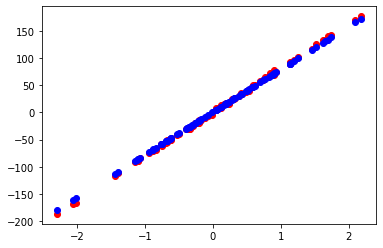

In [15]:
#plot
predicted = model(x).detach().numpy()

plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'bo')
plt.show()